# Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

# Content
Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='age', ylabel='Count'>

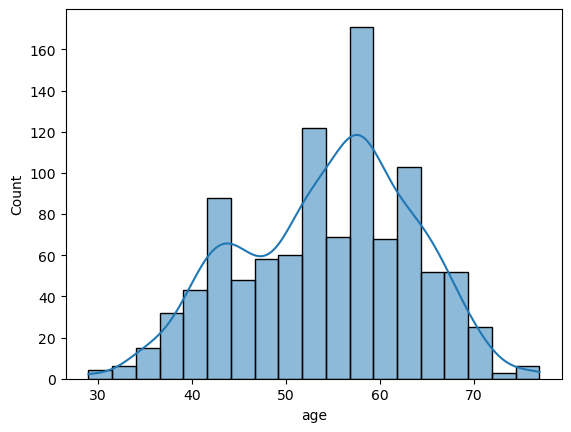

In [4]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='sex', ylabel='Count'>

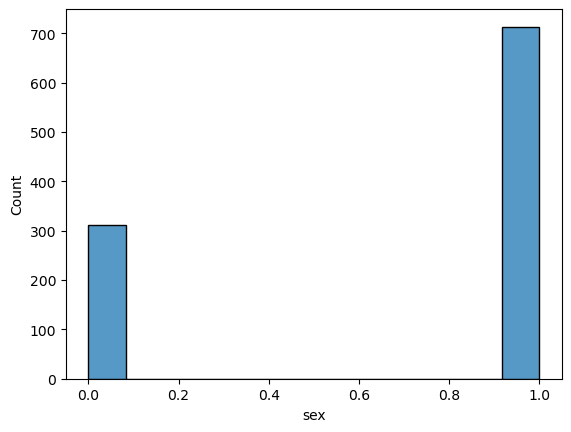

In [5]:
sns.histplot(x=df['sex'])
# 0 - female
# 1 male

c:\Users\amarc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


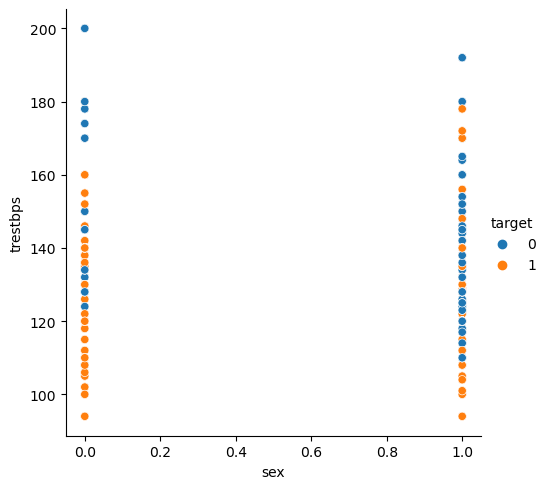

In [6]:
sns.relplot(x=df['sex'],y=df['trestbps'],hue=df['target'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Finding statistic data

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Finding null value

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Finding correlation

<Axes: >

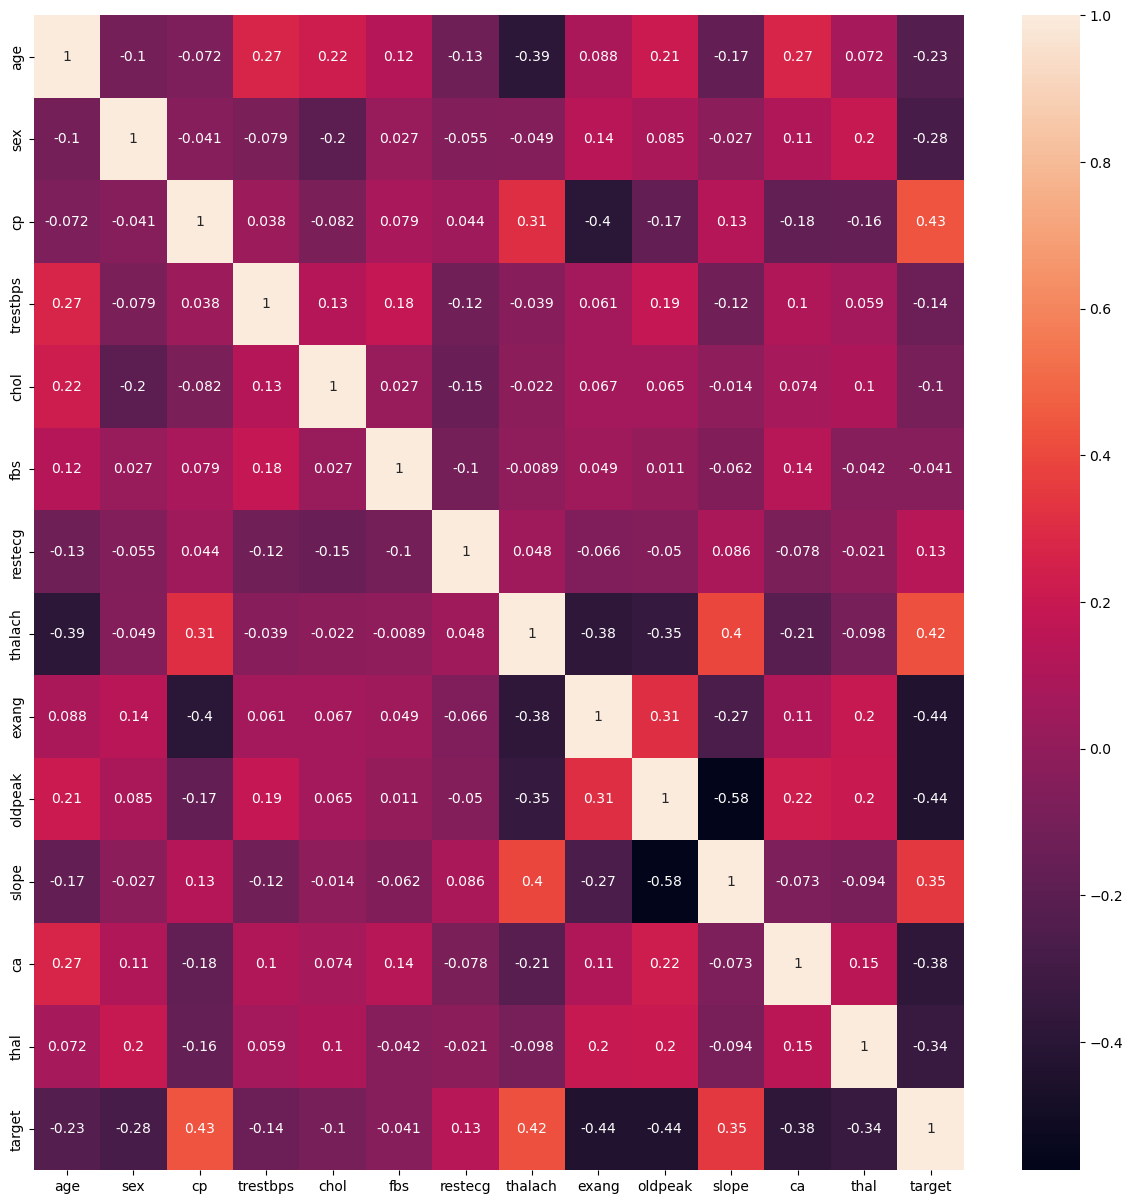

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# Handling Outliers

<Axes: >

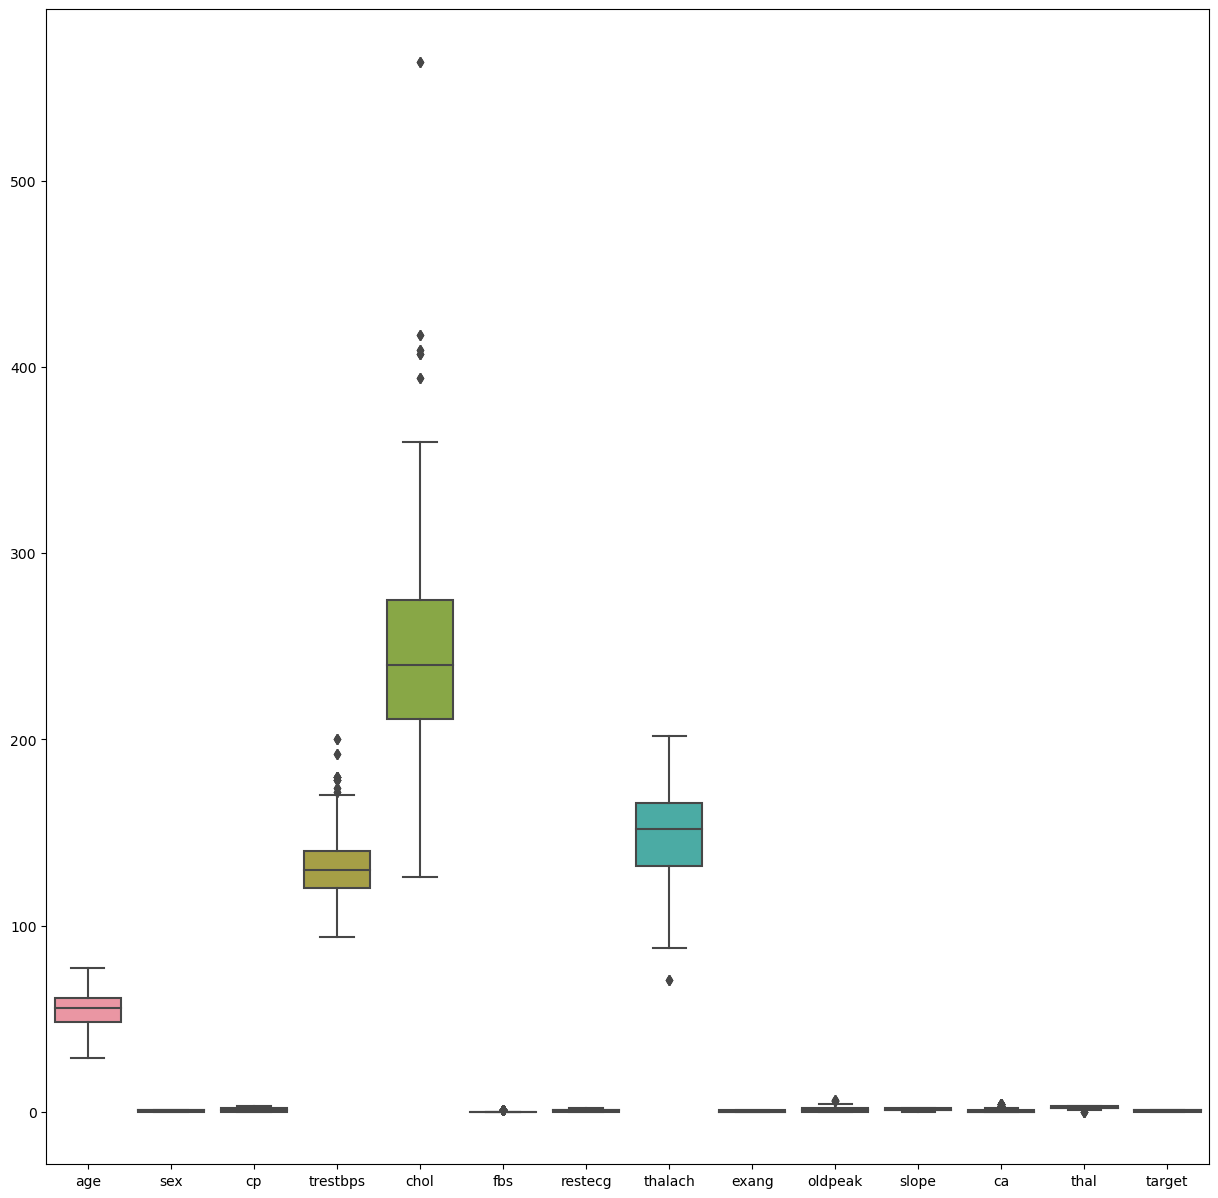

In [12]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df)

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [14]:
num_col = df.select_dtypes(["float64","int64"])
for i in num_col.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])


<Axes: >

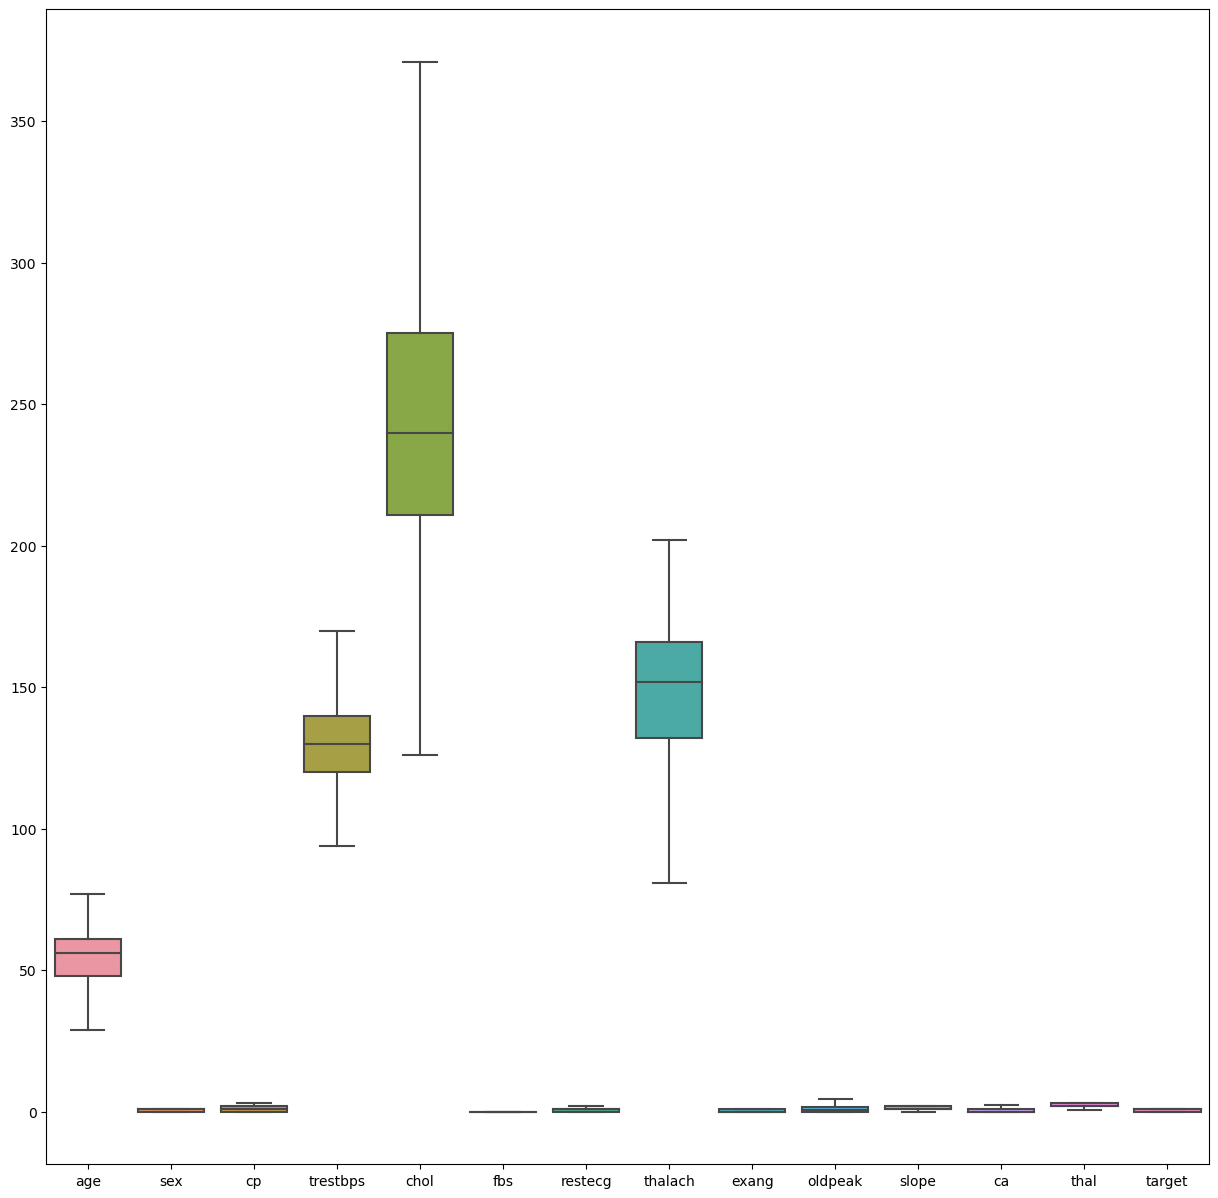

In [15]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,0.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,0.0,1.0,106.0,0.0,1.9,1.0,2.5,2.0,0.0


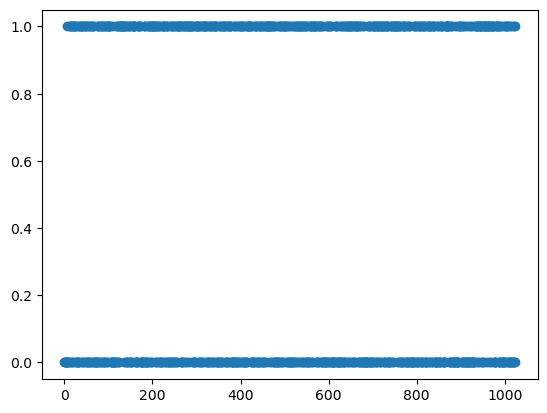

In [17]:
plt.scatter(x=df.index,y=df.target)

In [18]:
X=df.drop('target',axis=1)
y=df['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
treeclassifier=DecisionTreeClassifier()

In [23]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5100635593220338, 0.95, 'x[2] <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]'),
 Text(0.2733050847457627, 0.85, 'x[11] <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]'),
 Text(0.17372881355932204, 0.75, 'x[12] <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]'),
 Text(0.07627118644067797, 0.65, 'x[7] <= 119.5\ngini = 0.339\nsamples = 88\nvalue = [19, 69]'),
 Text(0.059322033898305086, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.09322033898305085, 0.55, 'x[8] <= 0.5\ngini = 0.28\nsamples = 83\nvalue = [14, 69]'),
 Text(0.03389830508474576, 0.45, 'x[4] <= 316.5\ngini = 0.07\nsamples = 55\nvalue = [2, 53]'),
 Text(0.01694915254237288, 0.35, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.05084745762711865, 0.35, 'x[7] <= 163.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03389830508474576, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06779661016949153, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15254237288

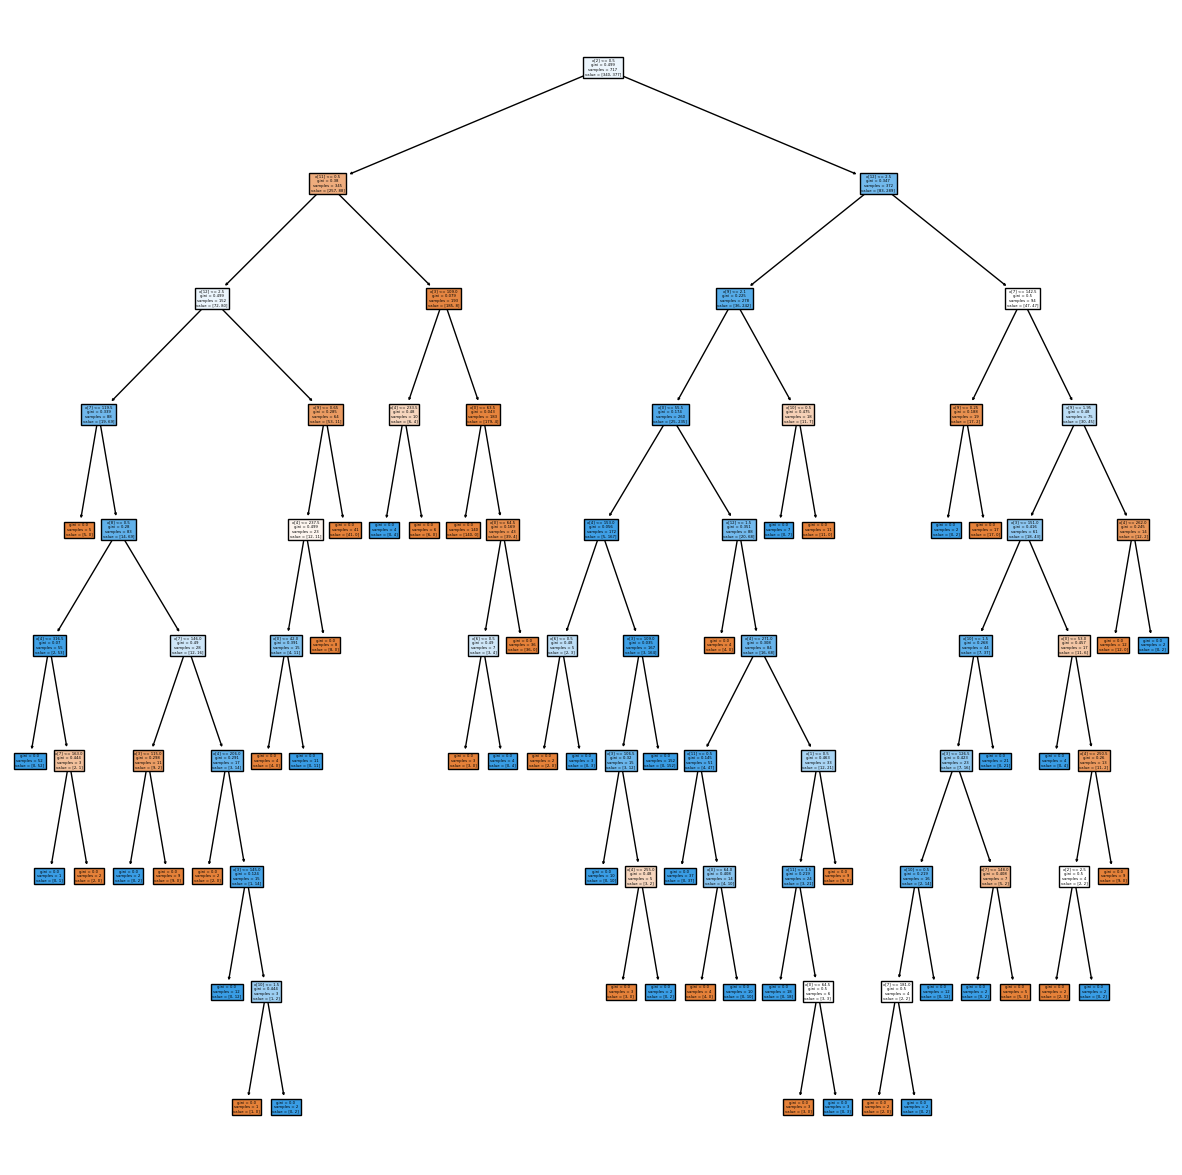

In [25]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(treeclassifier,filled=True)

In [26]:
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=4)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5208333333333334, 0.9, 'x[2] <= 0.5\nentropy = 0.998\nsamples = 717\nvalue = [340, 377]'),
 Text(0.2708333333333333, 0.7, 'x[11] <= 0.5\nentropy = 0.819\nsamples = 345\nvalue = [257, 88]'),
 Text(0.16666666666666666, 0.5, 'x[12] <= 2.5\nentropy = 0.998\nsamples = 152\nvalue = [72, 80]'),
 Text(0.08333333333333333, 0.3, 'x[10] <= 1.5\nentropy = 0.753\nsamples = 88\nvalue = [19, 69]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.968\nsamples = 43\nvalue = [17, 26]'),
 Text(0.125, 0.1, 'entropy = 0.262\nsamples = 45\nvalue = [2, 43]'),
 Text(0.25, 0.3, 'x[9] <= 0.65\nentropy = 0.662\nsamples = 64\nvalue = [53, 11]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.999\nsamples = 23\nvalue = [12, 11]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.375, 0.5, 'x[6] <= 0.5\nentropy = 0.249\nsamples = 193\nvalue = [185, 8]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.4166666666666667, 0.3, 'x[0] <

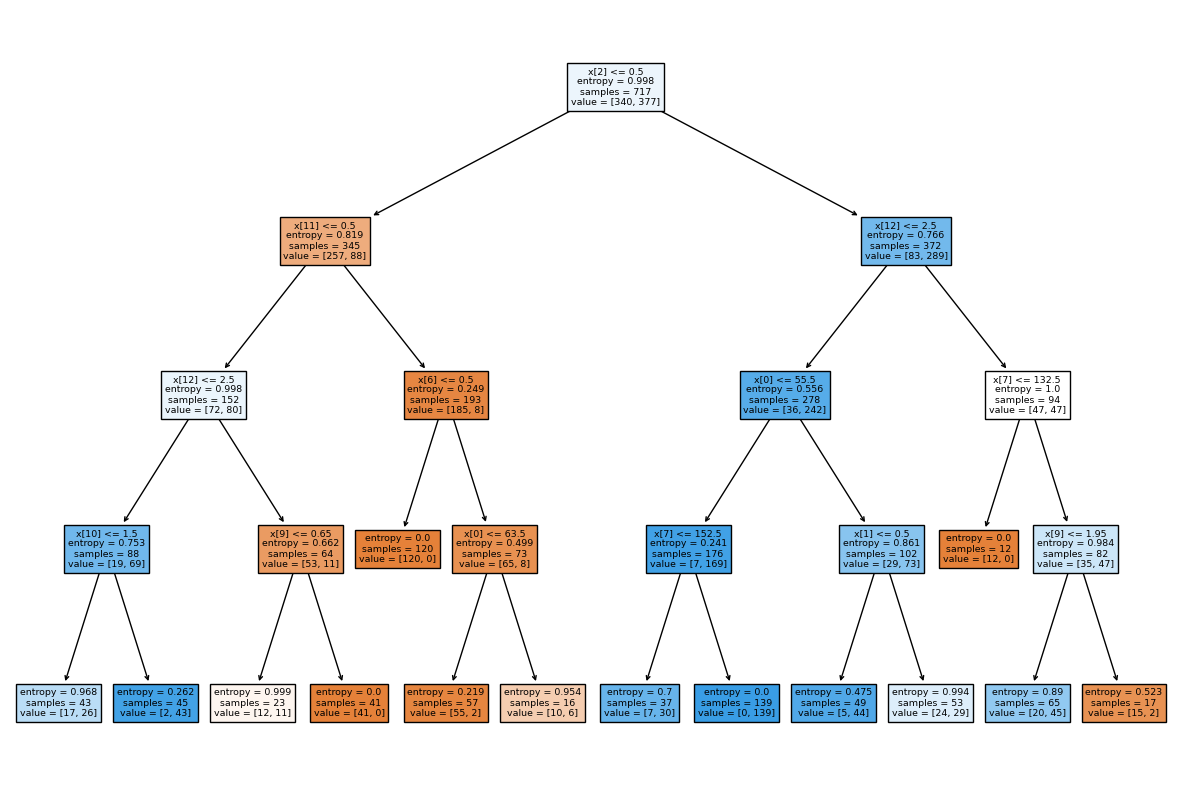

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [28]:
from sklearn.metrics import accuracy_score,classification_report

In [36]:
y_pred=treeclassifier.predict(X_test)

In [37]:
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))

0.8116883116883117
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80       159
         1.0       0.75      0.92      0.83       149

    accuracy                           0.81       308
   macro avg       0.83      0.82      0.81       308
weighted avg       0.83      0.81      0.81       308



In [38]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [39]:
gnb.fit(X_train,y_train)

GaussianNB()

In [40]:
y_pred=gnb.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[120  39]
 [ 15 134]]
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       159
         1.0       0.77      0.90      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308

0.8246753246753247


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rndm=RandomForestClassifier(max_depth=4)

In [61]:
rndm.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [62]:
y_pred=rndm.predict(X_test)

In [63]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[122  37]
 [ 11 138]]
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       159
         1.0       0.79      0.93      0.85       149

    accuracy                           0.84       308
   macro avg       0.85      0.85      0.84       308
weighted avg       0.86      0.84      0.84       308

0.8441558441558441


In [48]:
X_new=X_train[:5]

In [50]:
y_new=y_train[:5]

In [51]:
y_new

1020    1.0
479     0.0
227     1.0
910     0.0
362     1.0
Name: target, dtype: float64

In [49]:
X_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0
479,58.0,1.0,0.0,128.0,216.0,0.0,0.0,131.0,1.0,2.2,1.0,2.5,3.0
227,44.0,0.0,2.0,118.0,242.0,0.0,1.0,149.0,0.0,0.3,1.0,1.0,2.0
910,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
362,43.0,0.0,2.0,122.0,213.0,0.0,1.0,165.0,0.0,0.2,1.0,0.0,2.0


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [57]:
y_pred=clf.predict(X_test)

In [58]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[144  15]
 [ 10 139]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       159
         1.0       0.90      0.93      0.92       149

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

0.9188311688311688
